In [4]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [5]:
dfGerCred = pd.read_csv("german_credit.csv")
print(dfGerCred.shape)
print(dfGerCred.columns)
dfGerCred.head(5)

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split
y = dfGerCred['default']
X = dfGerCred.drop('default',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(500, 20) (500,)
(500, 20) (500,)


In [ ]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
# Print Shape of model data
pd.get_dummies(X_train).shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

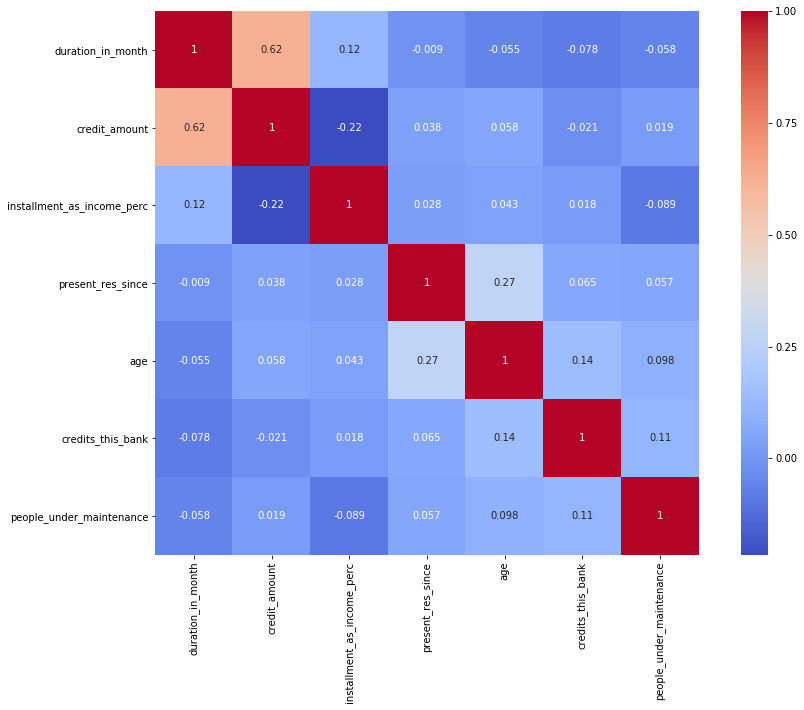

In [8]:
# Generating the correlation matrix and displaying correlation via heatmap
corr = X_train.corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask,annot=True,square=True,cmap="coolwarm")

### Drop the original variables which are converted to dummy

In [9]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_train.shape

(500, 48)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.30, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(350, 48) (350,)
(150, 48) (150,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [11]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999).fit(X_train, y_train)
print(randomforest,'\n')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False) 



### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [12]:
from sklearn import metrics
# Predict target variables y for test data
y_pred=randomforest.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.72
[[94 10]
 [32 14]]


### Q6 Show the list of the features importance( 1 Marks)

In [13]:
importances = randomforest.feature_importances_
importance_frame = pd.DataFrame({'Importance': list(importances), 'Feature': list(X_train.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True, ascending=False)
importance_col = importance_frame.Feature.head(10).values
print(importance_col)

['credit_amount' 'age' 'duration_in_month' 'installment_as_income_perc'
 'account_check_status_no checking account' 'present_res_since'
 'account_check_status_< 0 DM' 'purpose_car (new)'
 'credit_history_critical account/ other credits existing (not at this bank)'
 'other_installment_plans_none']


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [15]:
# Use below values
num_folds = 10
seed = 77

In [1]:
#Validate the Random Forest model build above using k fold

In [23]:
kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
cv_results = model_selection.cross_val_score(randomforest, X_test, y_test, cv=kfold)

In [0]:
#Calculate Mean score

In [102]:
print("Random Forest:", np.mean(cv_results))

Random Forest: 0.7133333333333333


In [0]:
# Calculate score standard deviation using std()

In [79]:
print("Standard Deviation:", cv_results.std())

Standard Deviation: 0.06699917080747263


# Q8 Print the confusion matrix( 1 Marks)

In [24]:
y_pred = model_selection.cross_val_predict(randomforest, X_test, y_test, cv=kfold)
print(metrics.confusion_matrix(y_test,y_pred))

[[92 12]
 [31 15]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [25]:
#Accuracy
print(metrics.accuracy_score(y_test,y_pred))
#Recall
print(metrics.recall_score(y_test,y_pred))
#Precision
print(metrics.precision_score(y_test,y_pred))

0.7133333333333334
0.32608695652173914
0.5555555555555556


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

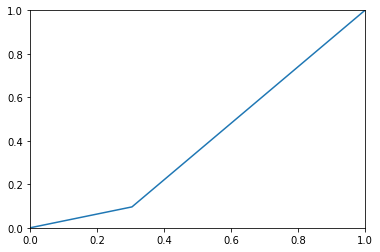

In [82]:
#ROC Curve and AUC
#True Positive Rate, False Positive Rate and Thresholds
tpr,fpr,thresholds=metrics.roc_curve(y_test,y_pred)

#Plotting the ROC curve
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
